In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\project\section2_porject_210222\winemag-data-130k-v2.csv", index_col=0)

In [3]:
title_lists = df["title"].tolist()

In [4]:
df["winery"].describe()

count                 129971
unique                 16757
top       Wines & Winemakers
freq                     222
Name: winery, dtype: object

In [5]:
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [8]:
import re

In [9]:
df["winery"].isnull().sum()

0

In [10]:
df.shape

(129971, 13)

In [11]:
year_wine = []
for list in title_lists :
    test = re.findall("\d+", list)
    for i in test:
        if int(i) > 2002 :
            df["year"] = int(i)
        else :
            df["year"] = 0

In [ ]:
df1['country'].dropna()

In [ ]:
df = pd.DataFrame(df1["variety"].value_counts())

In [ ]:
winery_count[winery_count["variety"] > 100 ].plot.hist()

In [ ]:
variety_point = df.groupby(['variety']).points.agg([len, min, max, sum])
variety_point["mean"] = variety_point["sum"]/variety_point["len"]
variety_point.sort_values(by="len", ascending=False)

In [ ]:
df1["points"].isnull().sum()

In [ ]:
variety_count = pd.DataFrame(df["variety"].value_counts())
variety_count

In [ ]:
df1.corr()

In [ ]:
# variety를 카운트하여 해당 카테고리를 인트로 변환하여 주었다. 
# 추후 scaler를 통하여 해당 값들은 조정해줄 예정이다. 
df = pd.merge(df, variety_count, left_on="variety", right_index=True)

In [ ]:
df1.head(2)

In [ ]:
df

<AxesSubplot:>

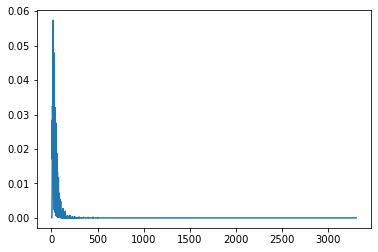

In [17]:
df['price'].value_counts(50).sort_index().plot.line()

<AxesSubplot:xlabel='price', ylabel='Density'>

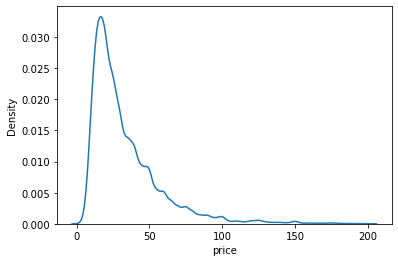

In [24]:
import seaborn as sns
sns.kdeplot(df.query('price < 200').price)

In [21]:
df[df["price"] < 200].shape

(120199, 14)

In [25]:
def std_based_outlier(df):
    for i in range(0, len(df.iloc[1])):
        df.iloc[:,i] = df.iloc[:,i].replace(0, np.NaN)
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))].fillna(0)
    return(df)


In [26]:
std_based_outlier(df)

TypeError: can only concatenate str (not "int") to str

<AxesSubplot:>

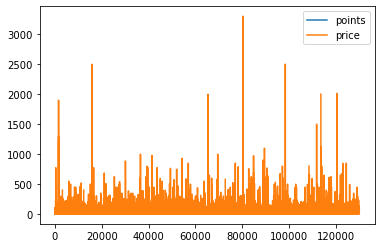

In [15]:
df[['points', "price"]].plot()

In [ ]:
df1[['variety', "price"]].corr()

In [ ]:
df1

In [ ]:
df1['price'].describe()

In [ ]:
sorted(counts.items(), key=lambda x: x[1])

In [ ]:
all_list = all_list.str.lower()